### Data Augmentation and Image Pipeline
- Real life dataset can be large or small.
- Data Augmentation is technique of augmenting data, which acts as a regulizer hence reduces overfitting.


In [1]:
import numpy as np
import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

2022-03-27 17:08:39.258118: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-27 17:08:39.258158: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
train_img_gen = ImageDataGenerator(
    rescale = 1/255.0,   # resacle every image in range 0-1.0
    width_shift_range = 0.2,  # shift upto 0-20% as it is range
    height_shift_range = 0.2,
    zoom_range = 0.3,
    shear_range = 0.2,
    horizontal_flip = True
)
# check out more arguments

test_img_gen = ImageDataGenerator(
    rescale=1/255.0 # for testing, we only need to rescale. 
)

In [3]:
train_gen = train_img_gen.flow_from_directory("tiny-imagenet-200/train", target_size=(64,64))
# no need to define target_size as it is already 64,64 by default.
# I used to here to just show that this parameter also exists

Found 100000 images belonging to 200 classes.


In [4]:
train_gen.class_indices

{'n01443537': 0,
 'n01629819': 1,
 'n01641577': 2,
 'n01644900': 3,
 'n01698640': 4,
 'n01742172': 5,
 'n01768244': 6,
 'n01770393': 7,
 'n01774384': 8,
 'n01774750': 9,
 'n01784675': 10,
 'n01855672': 11,
 'n01882714': 12,
 'n01910747': 13,
 'n01917289': 14,
 'n01944390': 15,
 'n01945685': 16,
 'n01950731': 17,
 'n01983481': 18,
 'n01984695': 19,
 'n02002724': 20,
 'n02056570': 21,
 'n02058221': 22,
 'n02074367': 23,
 'n02085620': 24,
 'n02094433': 25,
 'n02099601': 26,
 'n02099712': 27,
 'n02106662': 28,
 'n02113799': 29,
 'n02123045': 30,
 'n02123394': 31,
 'n02124075': 32,
 'n02125311': 33,
 'n02129165': 34,
 'n02132136': 35,
 'n02165456': 36,
 'n02190166': 37,
 'n02206856': 38,
 'n02226429': 39,
 'n02231487': 40,
 'n02233338': 41,
 'n02236044': 42,
 'n02268443': 43,
 'n02279972': 44,
 'n02281406': 45,
 'n02321529': 46,
 'n02364673': 47,
 'n02395406': 48,
 'n02403003': 49,
 'n02410509': 50,
 'n02415577': 51,
 'n02423022': 52,
 'n02437312': 53,
 'n02480495': 54,
 'n02481823': 55,
 '

In [5]:
import matplotlib.pyplot as plt

(32, 64, 64, 3) (32, 200)


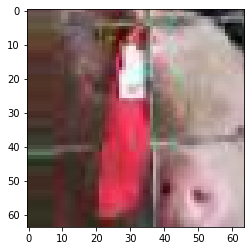

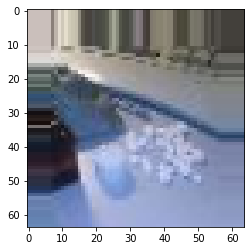

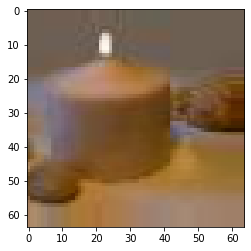

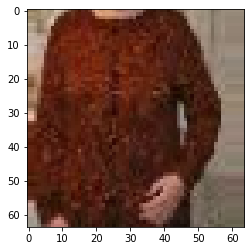

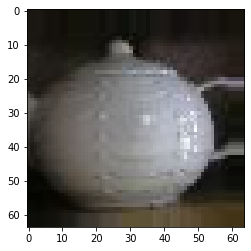

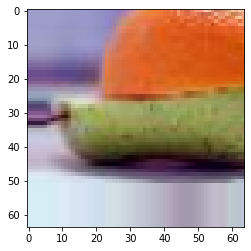

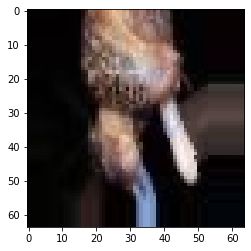

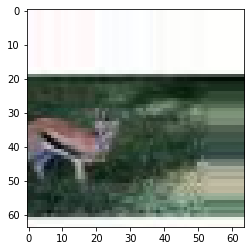

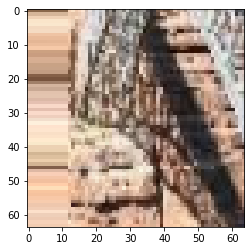

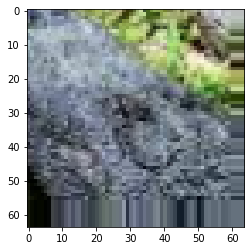

In [6]:
# we can use generator object in for loop or using gen_obj.next() method.
for (x,y) in train_gen:  # train generator object returns tuple (x,y) 
    print(x.shape, y.shape)
    
    for i in range(10):
        plt.imshow(x[i])
        plt.show()
    break  # to stop train_gen agter creating random data for only 1 time

In [8]:
# we will use this mapping later in validation set
class_ids = train_gen.class_indices
print(class_ids)

{'n01443537': 0, 'n01629819': 1, 'n01641577': 2, 'n01644900': 3, 'n01698640': 4, 'n01742172': 5, 'n01768244': 6, 'n01770393': 7, 'n01774384': 8, 'n01774750': 9, 'n01784675': 10, 'n01855672': 11, 'n01882714': 12, 'n01910747': 13, 'n01917289': 14, 'n01944390': 15, 'n01945685': 16, 'n01950731': 17, 'n01983481': 18, 'n01984695': 19, 'n02002724': 20, 'n02056570': 21, 'n02058221': 22, 'n02074367': 23, 'n02085620': 24, 'n02094433': 25, 'n02099601': 26, 'n02099712': 27, 'n02106662': 28, 'n02113799': 29, 'n02123045': 30, 'n02123394': 31, 'n02124075': 32, 'n02125311': 33, 'n02129165': 34, 'n02132136': 35, 'n02165456': 36, 'n02190166': 37, 'n02206856': 38, 'n02226429': 39, 'n02231487': 40, 'n02233338': 41, 'n02236044': 42, 'n02268443': 43, 'n02279972': 44, 'n02281406': 45, 'n02321529': 46, 'n02364673': 47, 'n02395406': 48, 'n02403003': 49, 'n02410509': 50, 'n02415577': 51, 'n02423022': 52, 'n02437312': 53, 'n02480495': 54, 'n02481823': 55, 'n02486410': 56, 'n02504458': 57, 'n02509815': 58, 'n0266

In [9]:
from tensorflow.keras.utils import to_categorical
# to convert y to one hot vector of 200 length. We need this for our cnn model

In [12]:
def load_validation_data(img_size, no_of_classes):
    with open("tiny-imagenet-200/val/val_annotations.txt") as f:
        lines = f.readlines()
        
        m = len(lines)  # number of images in validation set
        # img_size is a tuple: (64,64). So *(64,64) unpacks tuple to values 64,64
        x = np.empty((m,*img_size, 3))  # m,*(64,64),3 = m,64,64,3
        y = np.empty((m),dtype=int)
        
        for i,lines in enumerate(lines): # lines is each line in file and i is index
#             print(lines)
            tokens = lines.split()  #open annotation file and see there.
#             print(tokens)
            img_name = tokens[0]  # see in file, after splitting: 1st word is name of image
            img_label = tokens[1]  # 2nd word is label of image, see in annotation file
            # labels of file are same as 200 folders given in train set
            img_path = "tiny-imagenet-200/val/images/"+img_name
            img = image.load_img(img_path, target_size=img_size)
            x[i] = image.img_to_array(img)
            x[i] = x[i]/255.0
            y[i] = class_ids[img_label] # these are ids that we created from train_gem.class_indices
    return x, to_categorical(y, num_classes=no_of_classes)

In [13]:
X_val, Y_val = load_validation_data((64,64), 200)

In [15]:
print(X_val.shape, Y_val.shape)

(10000, 64, 64, 3) (10000, 200)
